#### Clustering & PCA Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where we come in as a data analyst. Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.  

### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing all datasets
dfPrimnary = pd.read_csv(r"C:\Users\anind\Desktop\PGDS\pca\submission\Country-data.csv")


In [3]:
print(len(dfPrimnary))


167


### Let's understand the structure of our dataframe

In [4]:
# Let's see the head of our master dataset
dfPrimnary.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
dfPrimnary.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Data Preparation

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset.we'll utilise the algorithm of PCA to perform dimensionality reduction of variable

In [6]:
dfPrimnary.shape
X = dfPrimnary.pop('country')

In [7]:
dfPrimnary.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(random_state=42)

In [10]:
pca.fit(dfPrimnary)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [11]:
pca.components_

array([[-8.07327698e-04,  5.11348092e-04,  2.52724061e-05,
         1.14384869e-04,  7.26746756e-01, -7.65998651e-05,
         2.13850032e-04, -2.87952778e-05,  6.86904777e-01],
       [-5.57055026e-04,  9.41707964e-04, -2.15627987e-04,
         5.41883715e-05,  6.86903991e-01,  2.85616792e-04,
         2.66353737e-05, -2.40728708e-05, -7.26747258e-01],
       [ 9.25215339e-01, -2.28627282e-01, -9.25844014e-03,
        -2.42704100e-01,  1.17358496e-03,  8.73842384e-02,
        -1.55747044e-01,  2.86462224e-02,  1.16146666e-04],
       [ 3.28783999e-01,  6.52814366e-01, -7.58649598e-03,
         6.78156522e-01, -4.12812338e-04, -2.19844970e-02,
        -7.23212922e-02,  8.16973465e-03,  2.44967157e-04],
       [-3.94786565e-02,  5.94987240e-01, -7.77516009e-02,
        -5.29179120e-01, -6.84017169e-04,  5.95872597e-01,
         5.69356462e-02,  7.02425075e-03,  3.74367532e-04],
       [-6.08330796e-02, -4.01990656e-01,  5.54312529e-02,
         4.41412073e-01,  1.95004065e-04,  7.978499

Looking at the explained variance ratio for each component

In [12]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

Making a scree plot for the explained variance

In [13]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

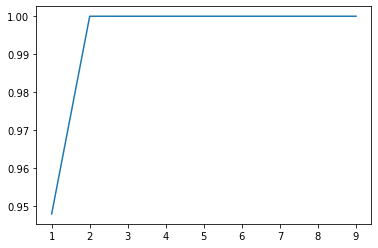

In [14]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

###### We can see that nearly 100 % of information is being explained by 2 components  

###### Perform PCA with 2 components

In [15]:
from sklearn.decomposition import IncrementalPCA

In [16]:
pc2 = PCA(n_components=2, random_state=42)

In [17]:
newdata = pc2.fit_transform(dfPrimnary)

In [18]:
newdata.shape

(167, 2)

In [19]:
df = pd.DataFrame(newdata, columns=["PC1", "PC2"])
df.head()

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


In [20]:
df_final = pd.concat([df,X ], axis=1)

In [21]:
df_final.head()

,PC1,PC2,country
0,-19815.128018,-1651.124720,Afghanistan
1,-11338.938992,1493.469028,Albania
2,-8926.352589,3264.684102,Algeria
3,-14652.465937,-867.795270,Angola
4,896.142032,1898.478151,Antigua and Barbuda


### Checking for Outliers

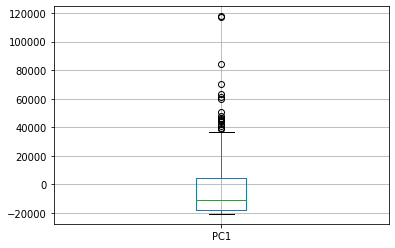

In [22]:
df_final.boxplot(column=['PC1'], return_type='axes');

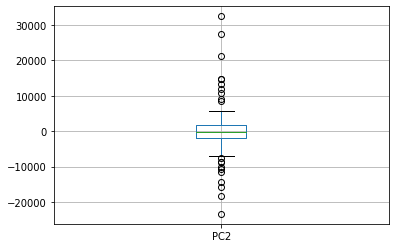

In [23]:
df_final.boxplot(column=['PC2'], return_type='axes');

In [24]:
# removing (statistical) outliers
Q1 = df_final.PC1.quantile(0.1)
Q3 = df_final.PC1.quantile(0.90)
IQR = Q3 - Q1
df_final1 = df_final[(df_final.PC1 >= Q1 - 1.5*IQR) & (df_final.PC1 <= Q3 + 1.5*IQR)]

# outlier treatment for PC2
Q1 = df_final1.PC2.quantile(0.1)
Q3 = df_final1.PC2.quantile(0.90)
IQR = Q3 - Q1
df_final = df_final1[(df_final1.PC2 >= Q1 - 1.5*IQR) & (df_final1.PC2 <= Q3 + 1.5*IQR)]




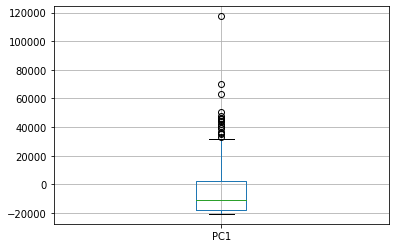

In [25]:
df_final.boxplot(column=['PC1'], return_type='axes');

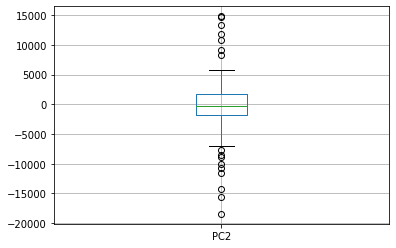

In [26]:
df_final.boxplot(column=['PC2'], return_type='axes');

In [27]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Applying Clustering on the data on our Principal components

In [28]:
#  scaling
rfm_df = df_final[['PC1', 'PC2']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(163, 2)

In [29]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['PC1','PC2']

##### Hopkins Statistics:

In [30]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [31]:
hopkins(rfm_df_scaled)

0.9483995960526236

##### As hopkins statistics says it is >.94 this dataset is good for clustering 

In [32]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.labels_

array([3, 0, 0, 3, 0, 0, 3, 1, 1, 0, 1, 2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0,
       3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 0, 1,
       0, 3, 0, 3, 2, 3, 0, 3, 1, 1, 0, 3, 3, 1, 3, 0, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 3, 0, 0, 1, 1, 1, 3, 1, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 2,
       0, 1, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 2, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 2, 0, 0,
       3, 0, 0, 0, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 2,
       1, 1, 0, 3, 3, 0, 3, 3, 3])

##### Finding the Optimal Number of Clusters

### SSD

##### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

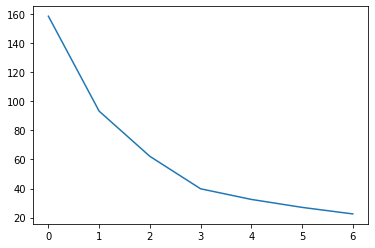

In [34]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [35]:
# From the above analysis we find that a disticnt bend at 2 clusters ,Hence choosing k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
df_final['cluster_id'] = kmeans.labels_
df_final

C:\Users\anind\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PC1,PC2,country,cluster_id
0,-19815.128018,-1651.124720,Afghanistan,1
1,-11338.938992,1493.469028,Albania,1
2,-8926.352589,3264.684102,Algeria,1
3,-14652.465937,-867.795270,Angola,1
4,896.142032,1898.478151,Antigua and Barbuda,1
5,-699.699306,3004.511711,Argentina,1
6,-14283.944388,-92.967224,Armenia,1
7,44372.702514,-11635.452719,Australia,0
8,42246.342149,-6765.258443,Austria,0
9,-5725.513089,4391.181823,Azerbaijan,1


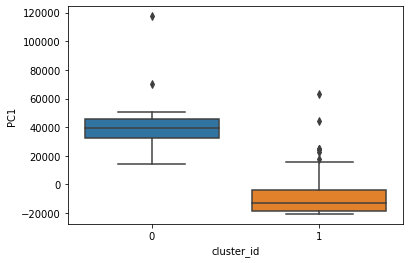

In [37]:
sns.boxplot(x='cluster_id', y='PC1', data=df_final)

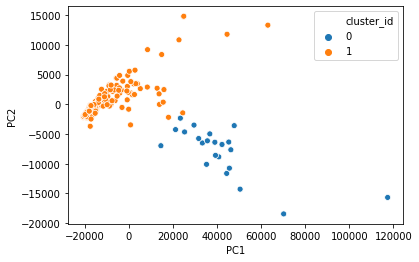

In [38]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df_final)

###### Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

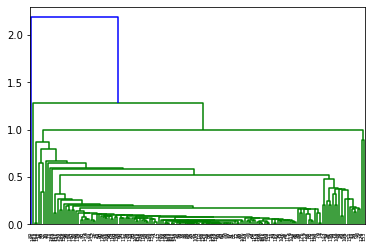

In [40]:
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

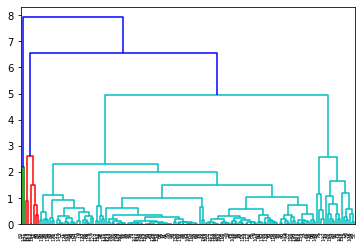

In [41]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
# assign cluster labels
df_final['cluster_labels'] = cluster_labels
df_final

C:\Users\anind\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PC1,PC2,country,cluster_id,cluster_labels
0,-19815.128018,-1651.124720,Afghanistan,1,0
1,-11338.938992,1493.469028,Albania,1,0
2,-8926.352589,3264.684102,Algeria,1,0
3,-14652.465937,-867.795270,Angola,1,0
4,896.142032,1898.478151,Antigua and Barbuda,1,0
5,-699.699306,3004.511711,Argentina,1,0
6,-14283.944388,-92.967224,Armenia,1,0
7,44372.702514,-11635.452719,Australia,0,0
8,42246.342149,-6765.258443,Austria,0,0
9,-5725.513089,4391.181823,Azerbaijan,1,0


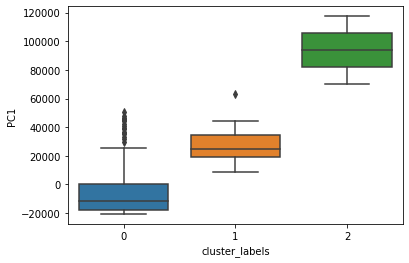

In [45]:
sns.boxplot(x='cluster_labels', y='PC1', data=df_final)

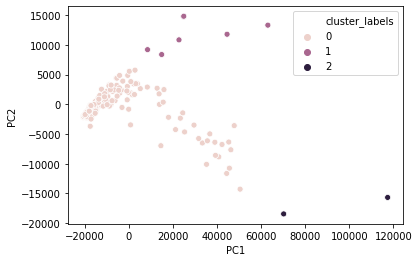

In [57]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',legend='full',data=df_final)

In [46]:
dfAll=pd.merge(dfPrimnary,df_final,left_index=True,right_index=True)

In [47]:
dfAll.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,country,cluster_id,cluster_labels
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-19815.128018,-1651.124720,Afghanistan,1,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-11338.938992,1493.469028,Albania,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-8926.352589,3264.684102,Algeria,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-14652.465937,-867.795270,Angola,1,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,896.142032,1898.478151,Antigua and Barbuda,1,0


In [48]:
dfPrimaryAfterCal=dfAll.drop(['PC1','PC2'],axis=1)
dfPrimaryAfterCal

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id,cluster_labels
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Afghanistan,1,0
1,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,Albania,1,0
2,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,Algeria,1,0
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Angola,1,0
4,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,Antigua and Barbuda,1,0
5,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,Argentina,1,0
6,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,Armenia,1,0
7,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,Australia,0,0
8,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,Austria,0,0
9,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,Azerbaijan,1,0


#### Cluster Analysis 

In [49]:
clus_gdpp=pd.DataFrame(dfPrimaryAfterCal.groupby(['cluster_id']).gdpp.mean())
clus_gdpp

,gdpp
cluster_id,
0,47290.909091
1,6331.304965


In [50]:
clus_child_mort=pd.DataFrame(dfPrimaryAfterCal.groupby(['cluster_id']).child_mort.mean())
clus_child_mort

,child_mort
cluster_id,
0,4.745455
1,44.348936


In [51]:
clus_income=pd.DataFrame(dfPrimaryAfterCal.groupby(['cluster_id']).income.mean())
clus_income

,income
cluster_id,
0,41931.818182
1,11330.234043


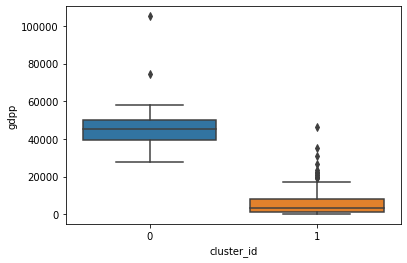

In [52]:
sns.boxplot(x='cluster_id', y='gdpp', data=dfPrimaryAfterCal)

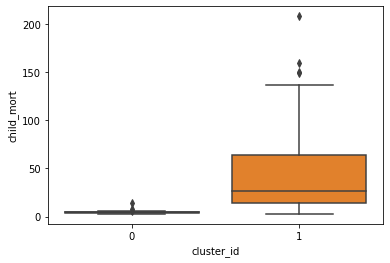

In [53]:
sns.boxplot(x='cluster_id', y='child_mort', data=dfPrimaryAfterCal)

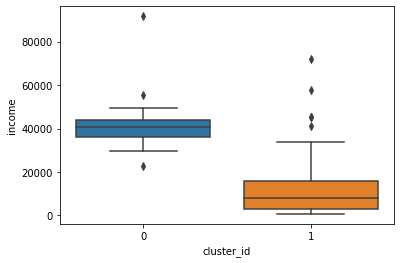

In [54]:
sns.boxplot(x='cluster_id', y='income', data=dfPrimaryAfterCal)

In [55]:
dfNeedHelp=dfPrimaryAfterCal[dfPrimaryAfterCal['cluster_id']==0]

###### Sorting based on child_mort,gdpp,income on cluster_id 0

In [211]:
dfNeedHelp.sort_values(['child_mort','gdpp','income'],ascending=[False,True,True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id,cluster_labels
66,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,Haiti,0,0
132,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,Sierra Leone,0,0
32,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,Chad,0,0
31,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,Central African Republic,0,0
97,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Mali,0,0
113,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,Nigeria,0,0
112,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,Niger,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola,0,0
37,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,"Congo, Dem. Rep.",0,0
25,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,Burkina Faso,0,0


###### Sorting based on child_mort,gdpp,income on cluster_Labels 0

In [212]:
dfNeedHelp1=dfPrimaryAfterCal[dfPrimaryAfterCal['cluster_labels']==0]
dfNeedHelp1.sort_values(['child_mort','gdpp','income'],ascending=[False,True,True]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id,cluster_labels
66,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,Haiti,0,0
132,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,Sierra Leone,0,0
32,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,Chad,0,0
31,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,Central African Republic,0,0
97,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Mali,0,0
113,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,Nigeria,0,0
112,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,Niger,0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola,0,0
37,116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,"Congo, Dem. Rep.",0,0
25,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,Burkina Faso,0,0


###### We can see that for both the cases the results are same : Haiti,Sierra Leone,Chad,Central African Republic,Mali,Nigeria these couties need most attention 

In [ ]:
dfNeedHelp1